# The Sparks Foundation - Data Science and Business Analytics

 ## TASK 2- Prediction using Unsupervised ML
 In this Task it is required to predict the optimum number of clusters and represent it visually
 ## Author - ANAS ANSARI

In [13]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans


# STEP 1 - Importing the data 

In [4]:
# importing the dataset
df = pd.read_csv('Iris.csv')
# observing the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# STEP 2 - Visualizing the data

In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.shape

(150, 6)

In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
# now we will drop the label column because it is an unsupervised learning problem
iris = pd.DataFrame(df)
iris_df = iris.drop(columns=['Species','Id'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# STEP 3 - Finding the optimum number of clusters
before clustering the data using kmeans, we need to specify the number of clusters. In order
to find the optimum number of clusters, there are various method available like Silhouette coefficient and the 
elbow method. Here the elbow method is used

In [14]:
# calculating the within cluster sum of square
within_cluster_sum_of_square = []
clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_df)
    within_cluster_sum_of_square.append(km.inertia_)


C:\Users\Anas Ansari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


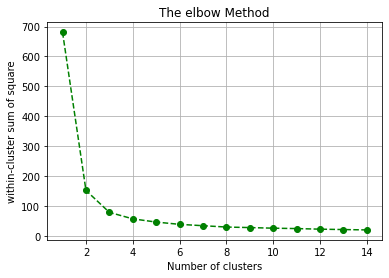

In [18]:
# plotting the within-cluster sum of square against clusters range
plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='green')
plt.title('The elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster sum of square')
plt.grid()
plt.show()

**we can see clearly why it is called elbow method from the above graph, the optimum clusters is where the
elbow occurs. This is when the within cluster sum of squares doesn't decrease significantly with every
iteration .
From this we choose the number of clusters as '3'.**

# STEP 4- Applying k-means clustering on the data

In [20]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,init = 'k-means++', max_iter = 300, n_init=10, random_state=0)
predictions = model.fit_predict(iris_df)

# STEP 5 - Visualizing the clusters

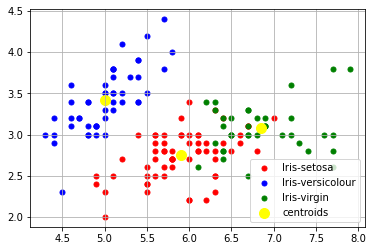

In [26]:
x = iris_df.iloc[:,[0,1,2,3]].values
plt.scatter(x[predictions == 0,0],x[predictions == 0,1],s = 25, c= 'red', label='Iris-setosa')
plt.scatter(x[predictions == 1,0],x[predictions == 1,1],s=25,c='blue',label='Iris-versicolour')
plt.scatter(x[predictions == 2,0],x[predictions == 2,1],s=25, c='green', label='Iris-virgin')

# plotting the cluster centre

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100, c='yellow', label='centroids')
plt.legend()
plt.grid()
plt.show()
